In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [291]:
data=pd.read_csv('heartdisease_data.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [292]:
#Assigning Headers
data.columns=['Age','Sex','cp','trestbps','Cholestrol','fbs','restECG','thalach','exang','oldpeak','slope','ca','thal','num']

EDA - Univariate Analysis

In [293]:
data.isnull().sum()

Age           0
Sex           0
cp            0
trestbps      0
Cholestrol    0
fbs           0
restECG       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

In [294]:
data.describe()

,Age,Sex,cp,restECG,num
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


In [295]:
data

,Age,Sex,cp,trestbps,Cholestrol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [296]:
data.dtypes

Age            int64
Sex            int64
cp             int64
trestbps      object
Cholestrol    object
fbs           object
restECG        int64
thalach       object
exang         object
oldpeak       object
slope         object
ca            object
thal          object
num            int64
dtype: object

In [297]:
data['ca'].value_counts()

?    198
0      2
Name: ca, dtype: int64

In [298]:
data['thal'].value_counts()

?    166
7     22
6      8
3      4
Name: thal, dtype: int64

In [299]:
data['slope'].value_counts()

?    102
2     53
3     29
1     16
Name: slope, dtype: int64

In [300]:
data['num'].value_counts()

1    56
0    51
3    42
2    41
4    10
Name: num, dtype: int64

In [301]:
data.drop(['ca','thal'],axis=1,inplace=True)

In [302]:
data['slope'].replace('?','2',inplace=True)

In [303]:
data

,Age,Sex,cp,trestbps,Cholestrol,fbs,restECG,thalach,exang,oldpeak,slope,num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,2,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,2,1
196,62,1,1,?,139,0,1,?,?,?,2,0
197,55,1,4,122,223,1,1,100,0,0,2,2
198,58,1,4,?,385,1,2,?,?,?,2,0


In [304]:
data['oldpeak'].value_counts()

?       56
0       40
2       25
1.5     21
1       18
3       13
2.5      9
0.5      7
4        4
1.3      2
1.6      1
-0.5     1
3.5      1
0.8      1
1.7      1
Name: oldpeak, dtype: int64

In [305]:
data['oldpeak'].replace('?','0',inplace=True)

In [306]:
data['exang'].value_counts()

1    95
?    53
0    52
Name: exang, dtype: int64

In [307]:
data['exang'].replace('?','1',inplace=True)

In [308]:
data['thalach'].value_counts()

?      53
120    12
140    12
110     8
130     6
112     6
118     4
128     4
105     4
160     4
100     4
150     4
135     3
125     3
117     3
102     3
84      3
108     3
122     3
148     3
106     3
86      3
98      2
80      2
111     2
129     2
96      2
165     2
180     2
154     2
127     2
138     2
119     2
141     1
126     1
151     1
88      1
131     1
145     1
107     1
69      1
132     1
94      1
144     1
161     1
159     1
121     1
123     1
93      1
155     1
99      1
157     1
133     1
149     1
73      1
115     1
124     1
113     1
162     1
97      1
Name: thalach, dtype: int64

In [309]:
data['thalach'].replace('?','0',inplace=True)

In [310]:
data['restECG'].value_counts()

1    93
0    80
2    27
Name: restECG, dtype: int64

In [311]:
data['fbs'].value_counts()

0    125
1     68
?      7
Name: fbs, dtype: int64

In [312]:
data['fbs'].replace('?','0',inplace=True)

In [313]:
data['Cholestrol'].value_counts()

0      49
?       7
220     4
258     4
203     4
       ..
271     1
153     1
308     1
160     1
193     1
Name: Cholestrol, Length: 100, dtype: int64

In [314]:
data['Cholestrol'].replace('?','0',inplace=True)

In [315]:
data['trestbps'].value_counts()

?      56
120    16
130    15
140    10
150     9
110     9
160     8
122     6
142     5
134     4
136     4
170     4
144     4
124     4
126     4
128     4
132     3
158     3
152     2
154     2
104     2
116     2
180     2
112     2
138     2
125     2
155     2
156     1
172     1
96      1
106     1
114     1
100     1
135     1
118     1
178     1
146     1
190     1
127     1
102     1
0       1
Name: trestbps, dtype: int64

In [316]:
data['trestbps'].replace('?','0',inplace=True)

In [317]:
data['cp'].value_counts()

4    131
3     47
2     14
1      8
Name: cp, dtype: int64

In [318]:
data['Sex'].value_counts()

1    194
0      6
Name: Sex, dtype: int64

In [319]:
data['Age'].value_counts()

63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: Age, dtype: int64

In [320]:
#Datatype conversion
data['trestbps']=data['trestbps'].astype(int)
data['Cholestrol']=data['Cholestrol'].astype(int)
data['fbs']=data['fbs'].astype(int)
data['thalach']=data['thalach'].astype(int)
data['exang']=data['exang'].astype(int)
data['oldpeak']=data['oldpeak'].astype(float)
data['slope']=data['slope'].astype(int)

In [321]:
data.dtypes

Age             int64
Sex             int64
cp              int64
trestbps        int32
Cholestrol      int32
fbs             int32
restECG         int64
thalach         int32
exang           int32
oldpeak       float64
slope           int32
num             int64
dtype: object

In [322]:
data

,Age,Sex,cp,trestbps,Cholestrol,fbs,restECG,thalach,exang,oldpeak,slope,num
0,63,1,4,140,260,0,1,112,1,3.0,2,2
1,44,1,4,130,209,0,1,127,0,0.0,2,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0.0,2,1
196,62,1,1,0,139,0,1,0,1,0.0,2,0
197,55,1,4,122,223,1,1,100,0,0.0,2,2
198,58,1,4,0,385,1,2,0,1,0.0,2,0


In [323]:
data['thalach'].replace(0,data['thalach'].mean(),inplace=True)

In [324]:
data['Cholestrol'].replace(0,data['Cholestrol'].mean(),inplace=True)

In [325]:
data

,Age,Sex,cp,trestbps,Cholestrol,fbs,restECG,thalach,exang,oldpeak,slope,num
0,63,1,4,140,260.0,0,1,112.000,1,3.0,2,2
1,44,1,4,130,209.0,0,1,127.000,0,0.0,2,0
2,60,1,4,132,218.0,0,1,140.000,1,1.5,3,2
3,55,1,4,142,228.0,0,1,149.000,1,2.5,1,1
4,66,1,3,110,213.0,1,2,99.000,1,1.3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333.0,1,1,154.000,0,0.0,2,1
196,62,1,1,0,139.0,0,1,90.255,1,0.0,2,0
197,55,1,4,122,223.0,1,1,100.000,0,0.0,2,2
198,58,1,4,0,385.0,1,2,90.255,1,0.0,2,0


In [326]:
data['Target']=data['num'].apply(lambda x: 1 if x>0 else 0)

In [327]:
data

,Age,Sex,cp,trestbps,Cholestrol,fbs,restECG,thalach,exang,oldpeak,slope,num,Target
0,63,1,4,140,260.0,0,1,112.000,1,3.0,2,2,1
1,44,1,4,130,209.0,0,1,127.000,0,0.0,2,0,0
2,60,1,4,132,218.0,0,1,140.000,1,1.5,3,2,1
3,55,1,4,142,228.0,0,1,149.000,1,2.5,1,1,1
4,66,1,3,110,213.0,1,2,99.000,1,1.3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333.0,1,1,154.000,0,0.0,2,1,1
196,62,1,1,0,139.0,0,1,90.255,1,0.0,2,0,0
197,55,1,4,122,223.0,1,1,100.000,0,0.0,2,2,1
198,58,1,4,0,385.0,1,2,90.255,1,0.0,2,0,0


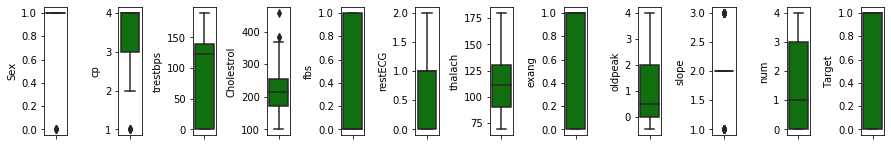

In [328]:
#Outlier detection
collist=data.columns.values
ncol=13
nrow=5
plt.figure(figsize=(ncol,10))
for i in range(1,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [329]:
#Removing outliers
from scipy.stats import zscore
z_sc=np.abs(zscore(data))
data=data[(z_sc<3).all(axis=1)]

In [330]:
data.shape

(182, 13)

In [331]:
#checking the distribution for skewness
data.skew()

Age          -0.311035
Sex           0.000000
cp           -1.343279
trestbps     -0.789935
Cholestrol    0.746662
fbs           0.784732
restECG       0.380717
thalach       0.548453
exang        -1.147352
oldpeak       0.781345
slope         0.233115
num           0.259429
Target       -1.288665
dtype: float64

In [332]:
#Removing the skewness
data['Cholestrol']=np.log1p(data['Cholestrol'])
data['fbs']=np.log1p(data['fbs'])
data['thalach']=np.log1p(data['thalach'])
data['oldpeak']=np.log1p(data['oldpeak'])

In [333]:
data.skew()

Age          -0.311035
Sex           0.000000
cp           -1.343279
trestbps     -0.789935
Cholestrol    0.259743
fbs           0.784732
restECG       0.380717
thalach       0.234287
exang        -1.147352
oldpeak       0.267155
slope         0.233115
num           0.259429
Target       -1.288665
dtype: float64

Data Visualisation

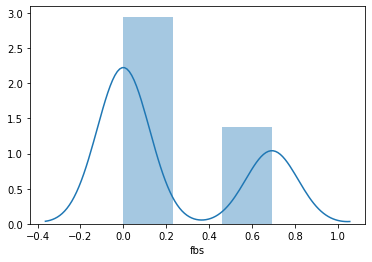

In [334]:
sns.distplot(data['fbs'])

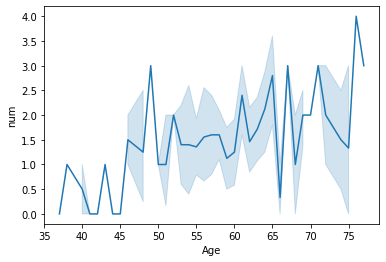

In [335]:
sns.lineplot(x='Age',y='num',data=data)

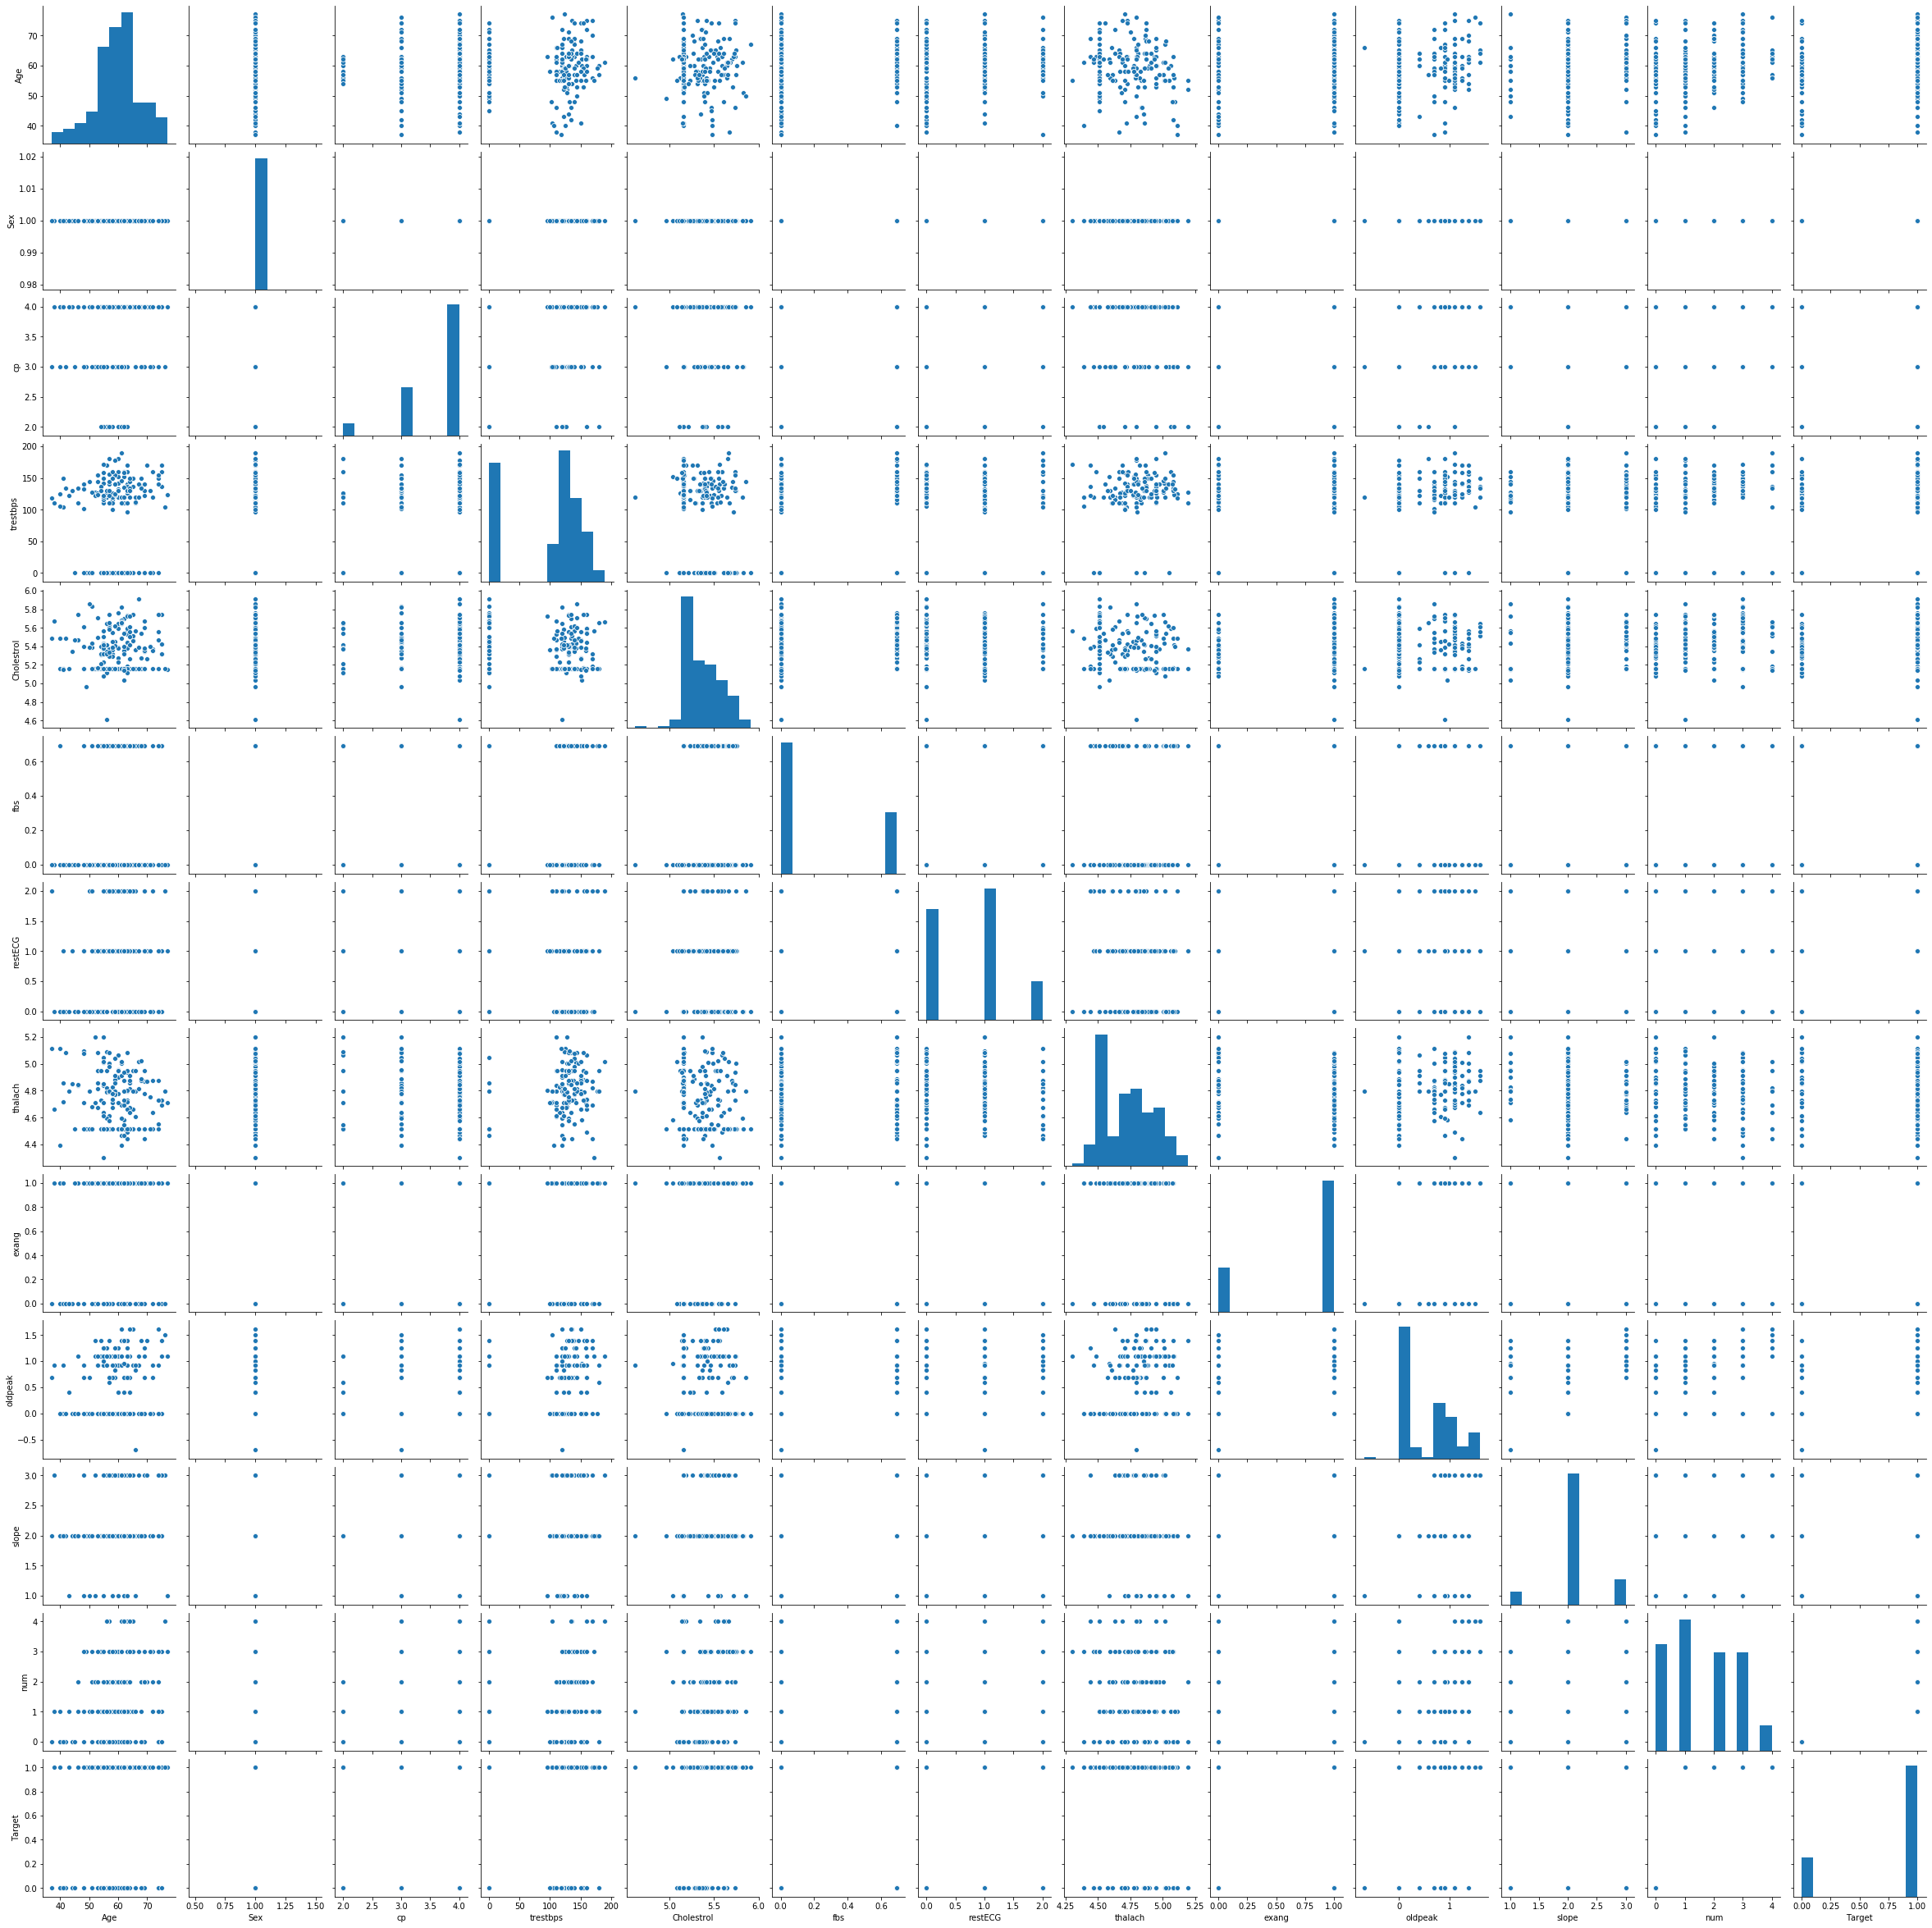

In [336]:
sns.pairplot(data)

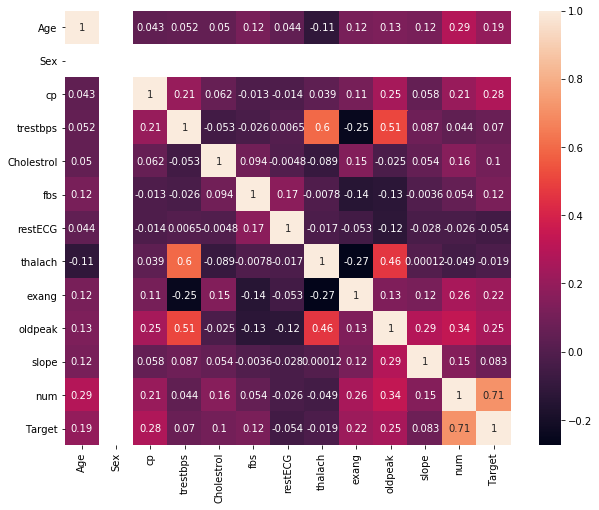

In [337]:
#Checking the correlation between variables
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

In [338]:
data['Sex'].value_counts()

1    182
Name: Sex, dtype: int64

In [339]:
data.drop(['Sex'],axis=1,inplace=True)

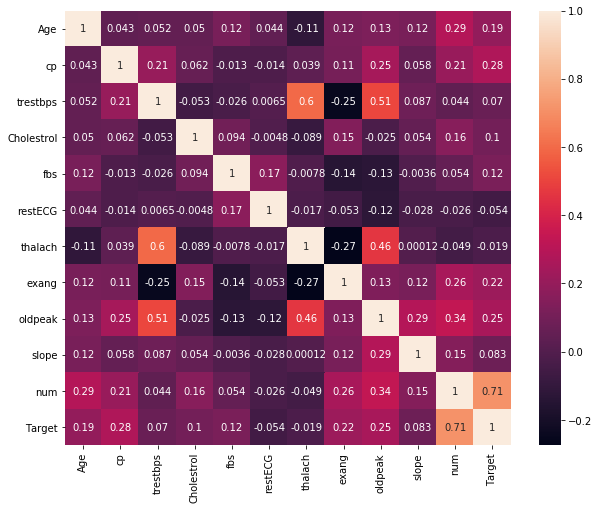

In [340]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

In [341]:
data.describe()

,Age,cp,trestbps,Cholestrol,fbs,restECG,thalach,exang,oldpeak,slope,num,Target
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,59.324176,3.615385,97.708791,5.360757,0.220893,0.741758,4.730721,0.747253,0.528676,2.071429,1.576923,0.769231
std,7.731643,0.608762,62.392872,0.213804,0.323873,0.684729,0.199161,0.435786,0.556073,0.470520,1.213240,0.422487
min,37.000000,2.000000,0.000000,4.615121,0.000000,0.000000,4.304065,0.000000,-0.693147,1.000000,0.000000,0.000000
25%,55.000000,3.000000,0.000000,5.156120,0.000000,0.000000,4.513658,0.250000,0.000000,2.000000,1.000000,1.000000
50%,60.000000,4.000000,123.000000,5.361281,0.000000,1.000000,4.727388,1.000000,0.405465,2.000000,1.000000,1.000000
75%,63.000000,4.000000,140.000000,5.504313,0.693147,1.000000,4.875197,1.000000,1.098612,2.000000,3.000000,1.000000
max,77.000000,4.000000,190.000000,5.913503,0.693147,2.000000,5.198497,1.000000,1.609438,3.000000,4.000000,1.000000


Preparing the model for machine learning

In [342]:
x=data.iloc[:,:-2]
x

,Age,cp,trestbps,Cholestrol,fbs,restECG,thalach,exang,oldpeak,slope
0,63,4,140,5.564520,0.000000,1,4.727388,1,1.386294,2
1,44,4,130,5.347108,0.000000,1,4.852030,0,0.000000,2
2,60,4,132,5.389072,0.000000,1,4.948760,1,0.916291,3
3,55,4,142,5.433722,0.000000,1,5.010635,1,1.252763,1
4,66,3,110,5.365976,0.693147,2,4.605170,1,0.832909,2
...,...,...,...,...,...,...,...,...,...,...
192,53,4,144,5.707110,0.693147,1,4.859812,1,0.916291,2
193,62,4,158,5.141664,0.000000,1,4.934474,1,0.000000,2
194,46,4,134,5.739793,0.000000,0,4.844187,0,0.000000,2
197,55,4,122,5.411646,0.693147,1,4.615121,0,0.000000,2


In [343]:
y=data.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      0
      ..
192    1
193    1
194    1
197    1
199    1
Name: Target, Length: 182, dtype: int64

In [344]:
y.values.reshape(-1,1)

array([[1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [345]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

Machine Learning Model Implementation

In [346]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [347]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(136, 10) (46, 10)
(136,) (46,)


In [348]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_curve

In [349]:
lr=LogisticRegression()
gnb=GaussianNB()
knc=KNeighborsClassifier(n_neighbors=8)
svc=SVC()
dtc=DecisionTreeClassifier(random_state=6)
rfc=RandomForestClassifier(n_estimators=200,random_state=42)

In [350]:
models =[]
models.append(('LogisticRegression',lr))
models.append(('GaussianNB',gnb))
models.append(('KNeighborsClassifer',knc))
models.append(('SVC',svc))
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))

In [351]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    score.append(AS*100)
    print('Accuracy Score =',AS)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score =',sc)
    cvs.append(sc*100)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc-auc score =',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report\n',classification_report(y_test,pred))
    print('\n')
    print('Confusion Matrix \n',confusion_matrix(y_test,pred))


************** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score = 0.7608695652173914


Cross Val Score = 0.8081871345029239
roc-auc score = 0.5623376623376624


Classification Report
               precision    recall  f1-score   support

           0       0.50      0.18      0.27        11
           1       0.79      0.94      0.86        35

    accuracy                           0.76        46
   macro avg       0.64      0.56      0.56        46
weighted avg       0.72      0.76      0.72        46



Confusion Matrix 
 [[ 2  9]
 [ 2 33]]
************** GaussianNB ***********


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy Score = 0.717391304347826


In [352]:
f_result=pd.DataFrame({'Model' : Model, 'Accuracy Score': score,'Cross_Val_Score':cvs,'ROC-AUC_Curve':rocscore})
f_result

,Model,Accuracy Score,Cross_Val_Score,ROC-AUC_Curve
0,LogisticRegression,76.086957,80.818713,56.233766
1,GaussianNB,71.739130,78.099415,59.610390
2,KNeighborsClassifer,76.086957,78.625731,62.467532
3,SVC,78.260870,78.567251,57.662338
4,DecisionTreeClassifier,71.739130,66.549708,65.844156
5,RandomForestClassifier,76.086957,75.847953,59.350649


In [353]:
from sklearn.externals import joblib
joblib.dump(knc,'HeartDisease_Prediction.pkl')

['HeartDisease_Prediction.pkl']